In [ ]:
!pip install keras

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import UpSampling2D, Flatten, Activation
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras import backend as K

from keras.datasets import cifar10



In [ ]:
(X_train, y_train), (X_test, y_test) =  cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
print('Size of the training_set: ', X_train.shape)
print('Size of the test_set: ', X_test.shape)
print('Shape of each image: ', X_train[0].shape)
print('Total number of classes: ', len(np.unique(y_train)))
print('Unique class labels: ', np.unique(y_train))

Size of the training_set:  (50000, 32, 32, 3)
Size of the test_set:  (10000, 32, 32, 3)
Shape of each image:  (32, 32, 3)
Total number of classes:  10
Unique class labels:  [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Lets plot and see what the images look like

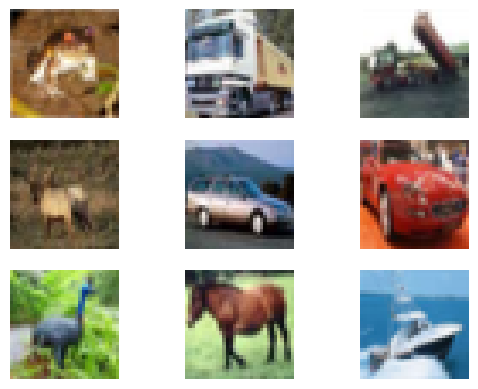

In [ ]:
# Plot of 9 random images
for i in range(0, 9):
    plt.subplot(331+i) # plot of 3 rows and 3 columns
    plt.axis('off') # turn off axis
    plt.imshow(X_train[i])

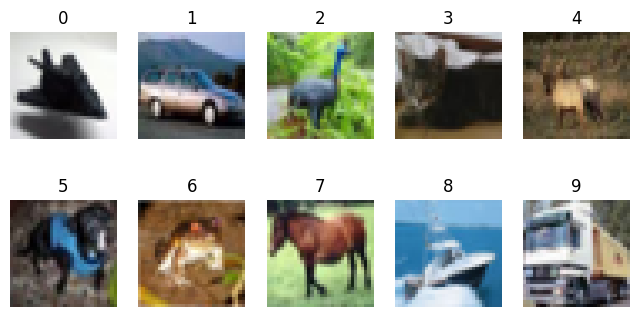

In [ ]:
# plot of an image from each class
fig=plt.figure(figsize=(8, 4))
columns = 5
rows = 2
for i in range(0, rows*columns):
    fig.add_subplot(rows, columns, i+1)
    plt.title(str(i)) # label
    plt.axis('off') # turn off axis
    plt.imshow(X_train[np.where(y_train==i)[0]][0]) # gray scale
plt.show()

# We have a dataset with 50000 images with each image having a shape of 32*32
# The CIFAR10 dataset has 10 different classes.

In [ ]:
print('Maximum pixel value in the training_set: ', np.max(X_train))
print('Minimum pixel value in the training_set: ', np.min(X_train))

Maximum pixel value in the training_set:  255
Minimum pixel value in the training_set:  0


In [ ]:
# Converting integer values to float types
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

In [ ]:
print('Maximum pixel value in the training_set (float): ', np.max(X_train))
print('Minimum pixel value in the training_set (float): ', np.min(X_train))

Maximum pixel value in the training_set (float):  255.0
Minimum pixel value in the training_set (float):  0.0


In [ ]:
# Scaling the data is an important preprocessing.
# For scaling, we will divide each centered image by 255

In [ ]:
# Scaling
X_train = X_train / 255
X_test = X_test / 255
print('Maximum pixel value in the training_set after Scaling: ', np.max(X_train))
print('Minimum pixel value in the training_set after Scaling: ', np.min(X_train))

Maximum pixel value in the training_set after Scaling:  1.0
Minimum pixel value in the training_set after Scaling:  0.0


In [ ]:
#Function to rescale the pixel values to range between 0 and 255
def upscale(image):
    return (image*255).astype(np.uint8)

In [ ]:
# Lets see if this works
z = upscale(X_train[0])
print('Maximum pixel value after upscaling centered and scaled image: ',np.max(z))
print('Maximum pixel value after upscaling centered and scaled image: ',np.min(z))

Maximum pixel value after upscaling centered and scaled image:  255
Maximum pixel value after upscaling centered and scaled image:  0


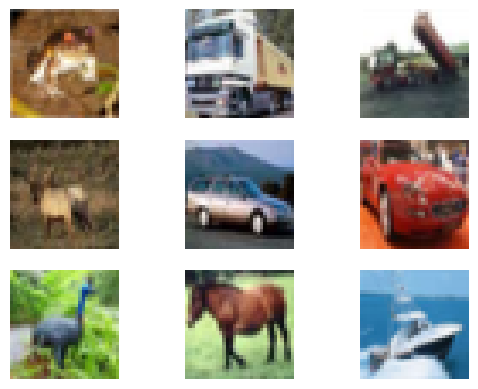

In [ ]:
# Plot of 9 scaled images after upscaling
for i in range(0, 9):
    plt.subplot(331+i) # plot of 3 rows and 3 columns
    plt.axis('off') # turn off axis
    plt.imshow(upscale(X_train[i]))

Using Mean Squared Error as the loss function

In [ ]:
from keras import backend as k
from keras.layers import AveragePooling2D

In [ ]:
# Clear the GPU memory with
k.clear_session()

In [ ]:
batch_size = 128
epochs = 5
input_shape = (32,32,3)

def make_autoencoder(input_shape):

    generator = Sequential()
    generator.add(Conv2D(96, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    generator.add(MinPooling2D(pool_size=(2, 2)))

    generator.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    generator.add(MinPooling2D(pool_size=(2, 2)))

    generator.add(Conv2D(256, (3, 3), activation='relu', padding='same'))

    generator.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    generator.add(UpSampling2D((2, 2)))

    generator.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    generator.add(UpSampling2D((2, 2)))

    generator.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

    return generator


autoencoder = make_autoencoder(input_shape)
autoencoder.compile(loss='mean_squared_error', optimizer = Adam(learning_rate=0.0002, beta_1=0.5))

autoencoder.summary()

autoencoder_train = autoencoder.fit(X_train, X_train, batch_size=batch_size,
                                    epochs=epochs,verbose=1,
                                    validation_split = 0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 96)        2688      
                                                                 
 average_pooling2d (Average  (None, 16, 16, 96)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       110720    
                                                                 
 average_pooling2d_1 (Avera  (None, 8, 8, 128)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 256)         5

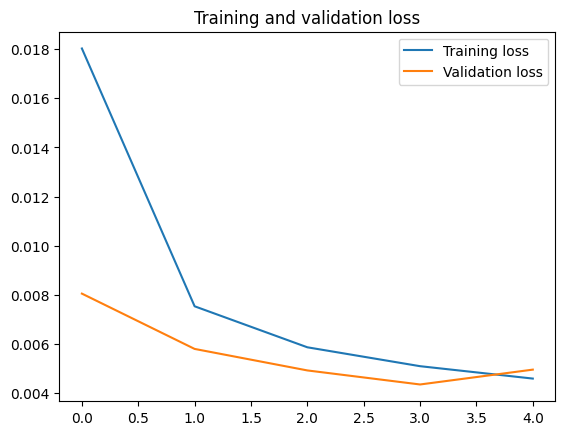

GENERATED


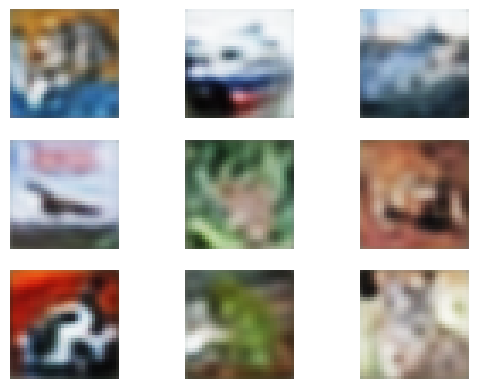

ORIGINAL


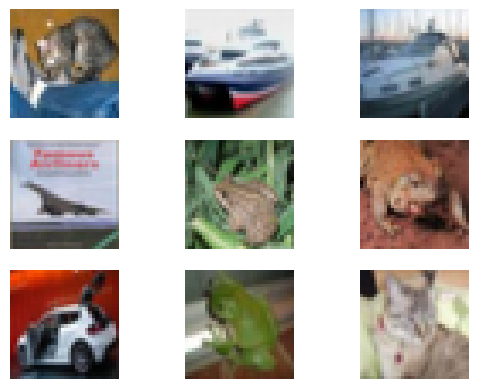

In [ ]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = [x for x in range(epochs)]
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Test set results
print('GENERATED')
for i in range(9):
    pred = autoencoder.predict(X_test[i:i+1], verbose=0)
    plt.subplot(331 + i)
    plt.axis('off')
    plt.imshow(upscale(pred[0]))
plt.show()

print('ORIGINAL')
for i in range(9):
    plt.subplot(331 + i)
    plt.axis('off')
    plt.imshow(upscale(np.squeeze(X_test[i])))
plt.show()

Using Binary Crossentropy as the loss function

In [ ]:
k.clear_session()

In [ ]:
batch_size = 128
epochs = 5
input_shape = (32,32,3)

def make_autoencoder(input_shape):
    generator = Sequential()
    generator.add(Conv2D(96, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    generator.add(MinPooling2D(pool_size=(2, 2)))

    generator.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    generator.add(MinPooling2D(pool_size=(2, 2)))

    generator.add(Conv2D(256, (3, 3), activation='relu', padding='same'))

    generator.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    generator.add(UpSampling2D((2, 2)))

    generator.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    generator.add(UpSampling2D((2, 2)))

    generator.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

    return generator


autoencoder = make_autoencoder(input_shape)
autoencoder.compile(loss='binary_crossentropy', optimizer = Adam(lr=0.0002, beta_1=0.5))

autoencoder.summary()

autoencoder_train = autoencoder.fit(X_train, X_train, batch_size=batch_size,
                                    epochs=epochs,verbose=1,
                                    validation_split = 0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 96)        2688      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       110720    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 256)         5

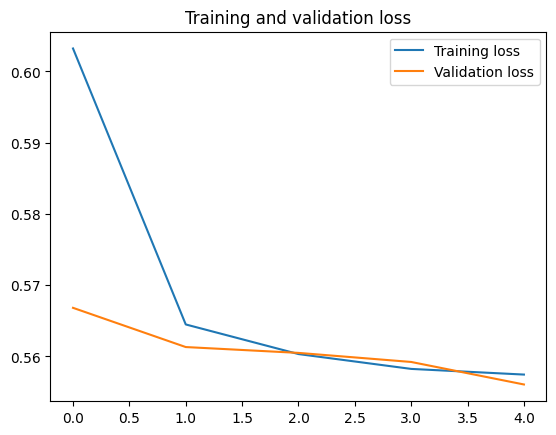

GENERATED


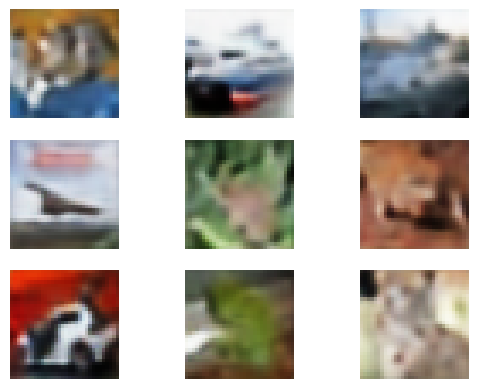

ORIGINAL


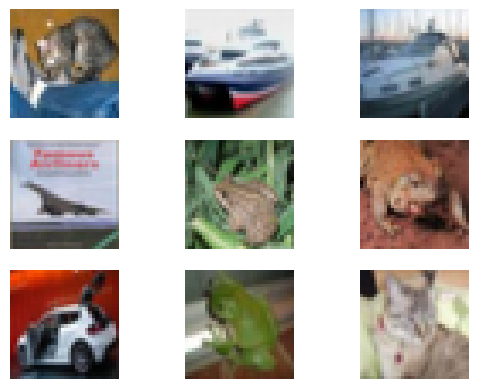

In [ ]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = [x for x in range(epochs)]
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()



# Test set results
print('GENERATED')
for i in range(9):
    pred = autoencoder.predict(X_test[i:i+1], verbose=0)
    plt.subplot(331 + i)
    plt.axis('off')
    plt.imshow(upscale(pred[0]))
plt.show()

print('ORIGINAL')
for i in range(9):
    plt.subplot(331 + i)
    plt.axis('off')
    plt.imshow(upscale(np.squeeze(X_test[i])))
plt.show()